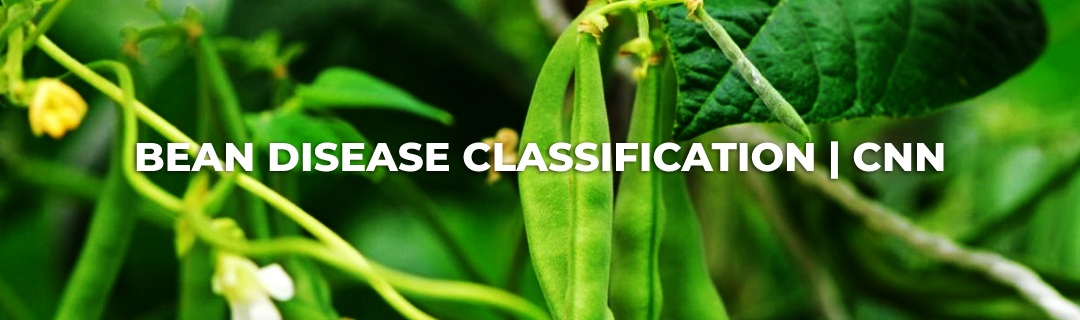


# 1. Introduction
The common bean serves as an important source of income for millions of African households. It is one of the most essential, widely grown, and consumed grain legume in Eastern, Central, and Southern Africa, where beans are grown on about 6.3 million hectares of land each year. **[Reference](https://www.pabra-africa.org/the-promise-of-beans/)**. It matures early, allowing farmers to reap huge harvests up to three times a year, ensuring profitability and household food security all year.

Aside from being a superior source of **`protein`**, they are also one of the best sources of **`iron`** and **`zinc`**, which are two of the most common nutritional deficiencies affecting over 2 billion people worldwide **[Reference](https://www.pabra-africa.org/the-promise-of-beans/)**. 

However, there are two common bean diseases that significantly decreases yields. They are: **`Angular Leaf Spot`** and **`Bean Rust`**.  

**Angular Leaf Spot**
Angular leaf spot (ALS) is a serious disease caused by the fungus **`Phaeoisariopsis griseola`**. Angular leaf spot lesions are most common on leaves and appear as grey or brown irregular spots surrounded by a chlorotic halo. Reduction in yield caused by ALS is primarily because of a decrease in photosynthetic area; however, the fungal pathogen can also reduce quality by causing lesions on pods. **[Reference](http://omafra.gov.on.ca/english/crops/facts/06-047.htm)**.

**Bean rust**
Bean rust is also a fungi infection caused by **`Uromyces appendiculatus`**. The disease occurs sporadically and is only significant during prolonged periods of warm, moist weather. Symptoms appear on leaves and pods as pustules of red-brown powdery spores (urediniospores) that rupture the outer layer. They are frequently surrounded by a yellow halo. This infection can cause defoliation, which causes the leaves to lose photosynthesis, resulting in decreased vigor and yield. **[Reference](https://ag.umass.edu/vegetable/fact-sheets/bean-rust)**.

The good news, however, is that if these diseases are spotted early enough, they can be controlled and treated with some specially formulated fungicides and pesticides.

<h4 style="background-color:#1a4d08;color:white; padding:12px">1.1. GOAL</h4>

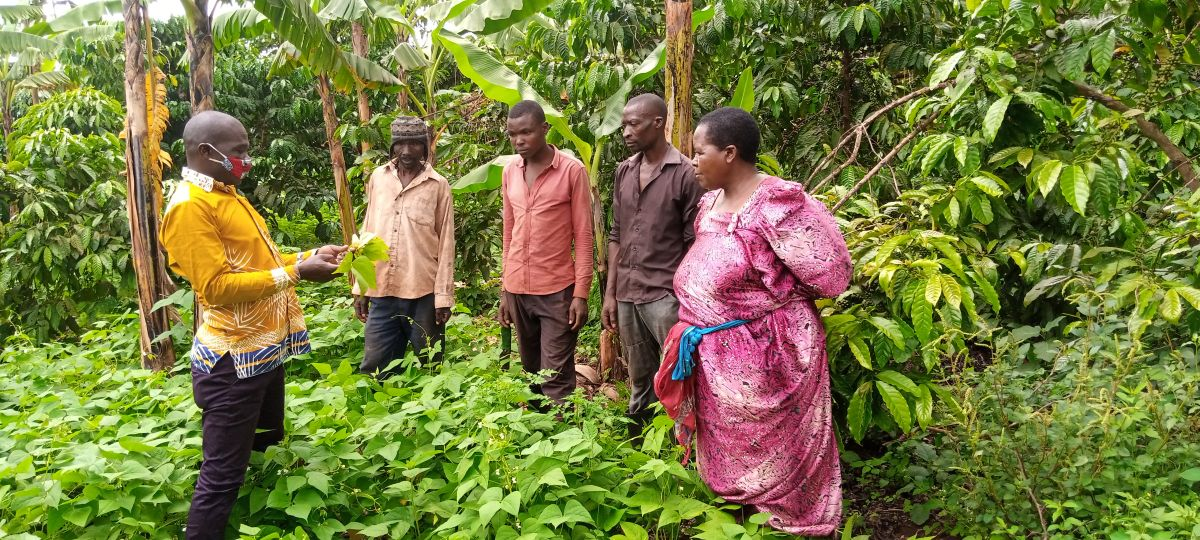

**[IMAGE SOURCE](https://www.pabra-africa.org/banking-on-beans-improving-nutrition-and-addressing-gender-inequality-in-africas-bean-value-chains/)**<br>

The goal of this project is to build a machine learning model that can help bean farmers mainly in Africa, detect bean leaves with defects early enough. This will be an end-to-end project in which I would build a mobile app that the farmers can use locally in their farms.  

<h4 style="background-color:#1a4d08;color:white; padding:12px">1.2. DATA SOURCE</h4>

The original dataset was obtained from **[AI-Lab Makerere](https://github.com/AI-Lab-Makerere/ibean/)**. The images were captured in bean fields by the Makerere AI lab in collaboration with the National Crops Resources Research Institute (NaCRRI), Uganda's national body in charge of agricultural research.

The dataset was already split into train, test, and validation sets. However, because I like to split the datasets myself, I merged the train, test, and validation images manually, and used the XnViewMP program to rename the files. It is a great tool for renaming images in batch. Incase you want to try it out, you can download it **[HERE](https://www.xnview.com/en/xnviewmp/)**.

<h4 style="background-color:#1a4d08;color:white; padding:12px">1.3. IMPORTING LIBRARIES AND DEPENDENCIES</h4>

In [1]:
%matplotlib inline

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model

import os

# 2. Loading And Visualizing the Data

<h4 style="background-color:#1a4d08;color:white; padding:12px">2.1. LOADING DATA</h4>

To load the images, I will use the Tensorflow tf.Data api which allows us to build a data input pipeline. 

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/bean-disease-dataset/Bean_Dataset",
    seed=85,
    # To randomly shuffle all the images
    shuffle=True,
    # Input image size
    image_size=(256, 256),
    # Set batch size to 32
    batch_size=32
)

Found 990 files belonging to 3 classes.


2022-10-29 21:13:29.845120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-29 21:13:29.933214: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-29 21:13:29.934063: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-29 21:13:29.942318: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [3]:
bean_classes = dataset.class_names
bean_classes

['angular_leaf_spot', 'bean_rust', 'healthy']

**Summary**<br>
Our dataset contains 990 files belonging to three classes:<br>
**`angular_leaf_spot`**,<br>
**`bean_rust`**, and<br>
**`healthy`**.

<h4 style="background-color:#1a4d08;color:white; padding:12px">2.2. DATA VISUALIZATION</h4>

Let's have a quick look at some of our images.

2022-10-29 21:13:32.437845: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


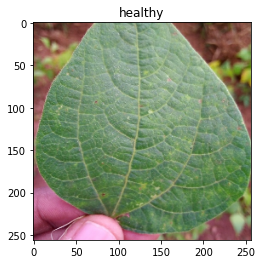

In [4]:
# Printing an image
for image_batch, labels_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(bean_classes[labels_batch[0]])

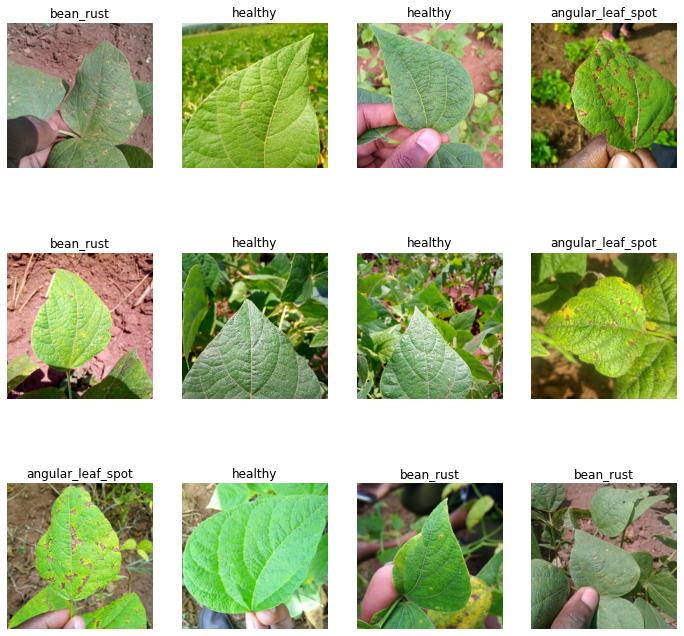

In [5]:
# First 12 images in the a batch
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(bean_classes[labels_batch[i]])
        plt.axis("off")

Let's see another batch of 12 images.

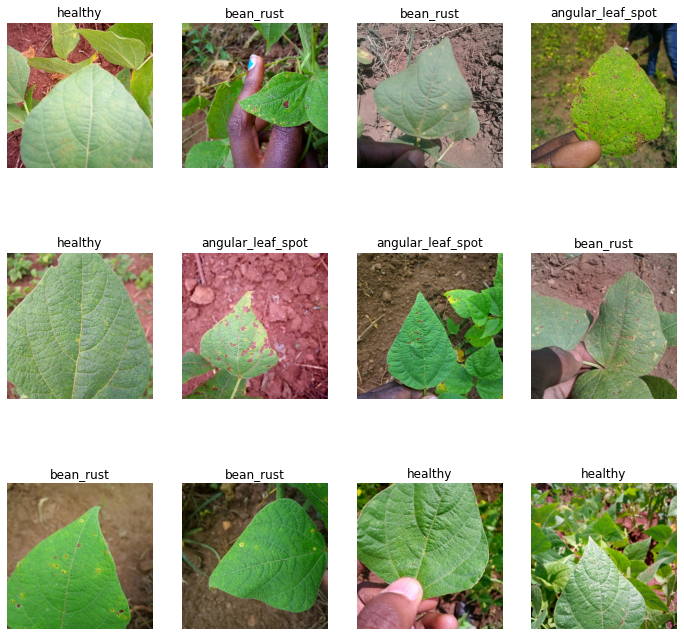

In [6]:
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(bean_classes[labels_batch[i]])
        plt.axis("off")

# 3. Split Dataset Into Train, Test, and Validation Sets

In [7]:
# Print the number of batches 
# In our dataset
len(dataset)

31

There are a total of 31 batches in our dataset.<br>
Out of the 31 batches, we will keep 80% as our training data.<br>
From the remaining 20%, 10% will be the validation set, which will be used in the training process. We will keep another 10% as the test set.

<h4 style="background-color:#1a4d08;color:white; padding:12px">3.1. HELPER FUNCTION TO SPLIT OUR DATA</h4>

Let's write a helper function that will split our data into train, validation, and test sets.

In [8]:
def get_dataset_partitions_tf(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    """
    Takes a dataset and splits it into train, validation and test sets. 
    """
    dataset_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=85)
    
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    
    train_set = dataset.take(train_size)    
    val_set = dataset.skip(train_size).take(val_size)
    test_set = dataset.skip(train_size).skip(val_size)
    
    return train_set, val_set, test_set

In [9]:
train_set, val_set, test_set = get_dataset_partitions_tf(dataset)

In [10]:
# Visualize the lenght of our splits
len(train_set), len(val_set), len(test_set)

(24, 3, 4)

**Train Set** = 24 batches<br>
**Validation set** = 3 batches<br>
**Test Set** = 4 batches

# 4. Configuring the Dataset for Better Performance
We will configure our dataset for better performance using the buffer prefetch, shuffling and cache method. We are going to do this for the train, validation and test splits.

* **Prefetching** helps minimize the step time to the maximum of the training and the time it takes to extract the data.
* **Caching** helps cache a dataset, either in memory or on local storage, which helps save some operations like file opening and data reading from being executed during epoch. **[Reference](https://www.tensorflow.org/guide/data_performance)**.

In [11]:
print("Configuring the dataset for better performance")
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_set = val_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

Configuring the dataset for better performance


# 5. Data Preprocessing
<h4 style="background-color:#1a4d08;color:white; padding:12px">5.1. RESIZE AND RESCALING THE DATA</h4>

Even though the images are already 256 X 256 in dimension, we still need to resize it so that if an image that is not within this dimension is inputted during prediction, it will automatically resize it. 

In [12]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1.0/255),
])

<h4 style="background-color:#1a4d08;color:white; padding:12px">5.2. DATA AUGMENTATION</h4>

Since we are not working with a huge data, we will do data augmentation to boost accuracy of our model. Data augmentation artificially increases the amount of data by generating new data points from existing data. **[Reference](https://www.v7labs.com/blog/data-augmentation-guide)**.

In [13]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
# Apply data augmentation to train dataset

train_set = train_set.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# 6. Modeling

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.1. BUILD THE MODEL</h4>

For this we'll use the convolutional neural network (CNN). In building this model, we will pass a couple of layers: `resize_and_rescale`, `data_augmentation`, `Conv2D`, `Maxpooling2D`, `Flatten`, and `Dense` layers.

In [15]:
input_shape = (32, 256, 256, 3)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(16,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16,(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [16]:
# View summary of our model parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 16)         

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.2. COMPILE THE MODEL</h4>

We'll use the `adam` optimizer. And then define the `loss` and `accuracy` metrics in each epoch.

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.3. FIT THE MODEL</h4>

In [18]:
history = model.fit(
    train_set,
    batch_size=32,
    validation_data=val_set,
    verbose=1,
    epochs=60,
)

Epoch 1/60


2022-10-29 21:13:46.232483: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


24/24 [==============================] - 21s 375ms/step - loss: 1.0985 - accuracy: 0.3264 - val_loss: 1.0894 - val_accuracy: 0.3958
Epoch 2/60
24/24 [==============================] - 6s 260ms/step - loss: 1.0476 - accuracy: 0.4569 - val_loss: 0.9873 - val_accuracy: 0.4792
Epoch 3/60
24/24 [==============================] - 7s 290ms/step - loss: 1.0086 - accuracy: 0.4830 - val_loss: 0.9892 - val_accuracy: 0.4688
Epoch 4/60
24/24 [==============================] - 6s 258ms/step - loss: 0.9325 - accuracy: 0.5457 - val_loss: 0.8737 - val_accuracy: 0.6562
Epoch 5/60
24/24 [==============================] - 6s 251ms/step - loss: 0.8871 - accuracy: 0.5875 - val_loss: 0.8641 - val_accuracy: 0.6562
Epoch 6/60
24/24 [==============================] - 6s 253ms/step - loss: 0.8754 - accuracy: 0.5979 - val_loss: 0.8599 - val_accuracy: 0.5938
Epoch 7/60
24/24 [==============================] - 6s 270ms/step - loss: 0.7981 - accuracy: 0.6462 - val_loss: 0.8003 - val_accuracy: 0.6562
Epoch 8/60
24/24

In [19]:
# Evaluate model performance on test set
scores = model.evaluate(test_set)

4/4 [==============================] - 3s 11ms/step - loss: 0.3278 - accuracy: 0.8750


In [20]:
scores

[0.32779014110565186, 0.875]

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.4. PLOT ACCURACY AND LOSS CURVE</h4>

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

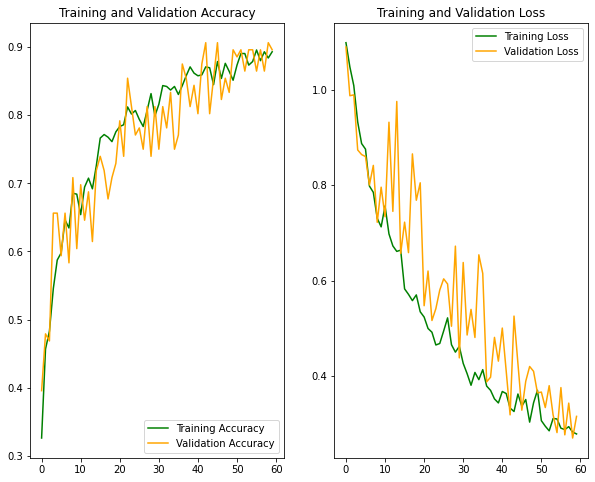

In [22]:
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(range(60), acc, color='green', label='Training Accuracy')
plt.plot(range(60), val_acc, color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(60), loss, color='green', label='Training Loss')
plt.plot(range(60), val_loss,color='orange', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h4 style="background-color:#1a4d08;color:white; padding:12px">6.5. MAKE PREDICTION ON TEST SET</h4>

In [23]:
# Function that takes an image as an input
# And gives us the confidence score of the prediction

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


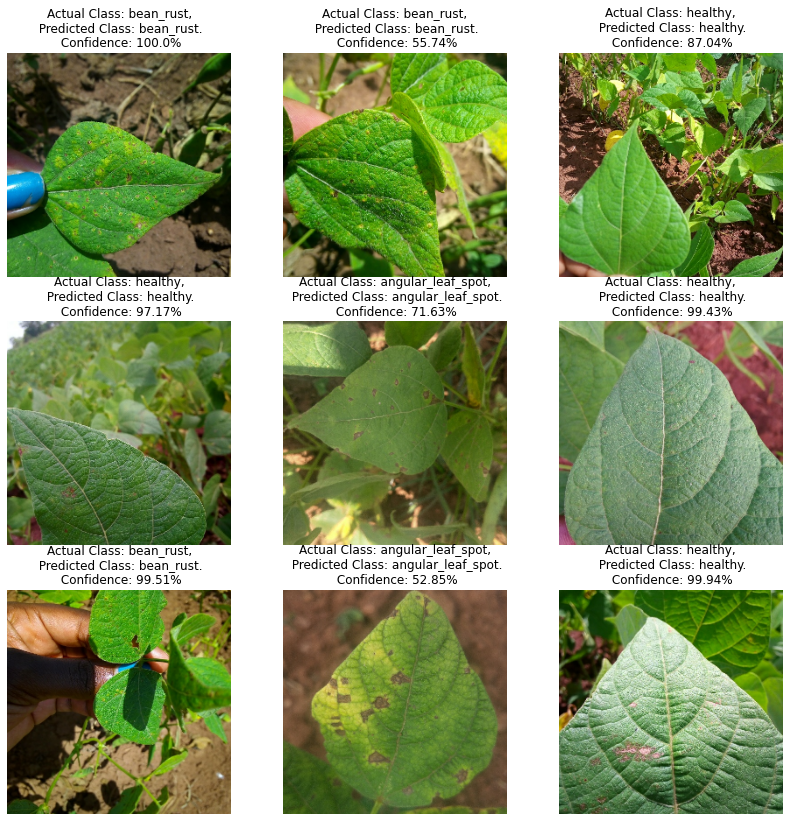

In [24]:
# Let's predict the first 9 images in the first batch
class_names = bean_classes

plt.figure(figsize=(14, 14))
for images, labels in test_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual Class: {actual_class},\n Predicted Class: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
        

# 7. Save Model

In [25]:
model.save(os.path.join('models', 'bean_disease_model.h5'))